# Урок 3. Логистическая регрессия

Небольшой шаг назад...

Линейная регрессия
![img/lr.png](img/lr.png)

- Предсказываем значение у, которые могут принимать любые значения из R
- Предсказываем через линейную комбинацию $$\vec y = X \vec w$$
- Находим оптимальные W с помощью градиентного спуска
- Функция потерь (MSE): $$L(x, y, w) = \frac{1}{2n} \sum_{i=1}^n (y_i - \vec{w}^T \vec{x}_i)^2$$

Как же предсказать значения у == 0/1 ?

-

In [3]:
import numpy as np
import matplotlib.pyplot as plt

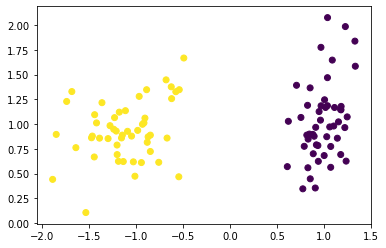

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1], c=y);

Функция потерь:  
$$L(𝑎,𝑋)=\frac{1}{l}\sum_{i=1}^n[𝑀𝑖<0]$$  
штрафуем за кол-во ошибок

In [5]:
def loss_func(x):
    return 0 if x > 0 else 1

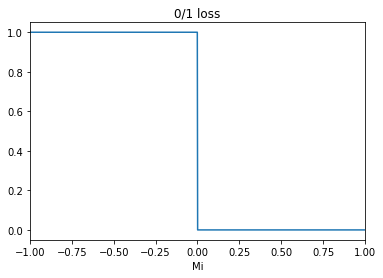

In [6]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.title('0/1 loss')
plt.plot(dots, zero_one_loss);

Логлосс:
- при у = {0;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = −\frac{1}{l}\sum_{i=1}^n(y_𝑖ln(a(x_i))+(1−y_𝑖)ln(1 - a(x_i))$$
- при у = {-1;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = - \sum_{i=1}^{\ell} \log (1 + \exp^{-a(x_i)})$$ где $$a(x_i) = y_i\vec{w}^T\vec{x_i}$$

In [7]:
def log_loss(x):
    return np.log2(1+np.exp(-x))

In [8]:
def exp_func(x):
    return np.exp(-x)

In [9]:
def square_loss(x):
    return (1 - x)**2

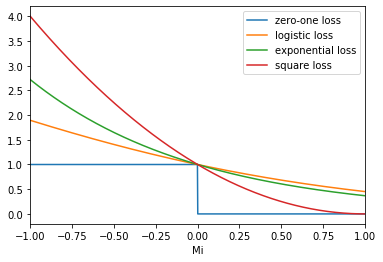

In [10]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]
log_losses = [log_loss(x) for x in dots]
exp_funces = [exp_func(x) for x in dots]
square_losses = [square_loss(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, zero_one_loss)
plt.plot(dots, log_losses)
plt.plot(dots, exp_funces)
plt.plot(dots, square_losses)
plt.legend(['zero-one loss', 'logistic loss', 'exponential loss', 'square loss']);

### Logreg на примере

In [11]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [12]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [13]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [14]:
def custom_StandardScaler(x):
    return (x - x.mean())/x.std()

In [15]:
X_st = X.copy()
X_st[2] = custom_StandardScaler(X_st[2])

In [16]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [17]:
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [26]:
np.log(y_pred1)

array([-0.10536052, -2.30258509])

In [19]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051565782628

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
z = np.linspace(-10, 10, 100)

p = sigmoid(z)

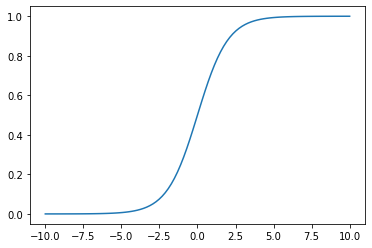

In [22]:
plt.plot(z, p);

In [27]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [35]:
W = logreg_eval_model(X_st, y, iterations=10000, alpha=1)

итерация: 1000, logloss: 0.24950733333295277, веса: [-11.56146493  -1.47670244  -2.4733166    9.72599362]
итерация: 2000, logloss: 0.20715758808074533, веса: [-16.45714357  -1.88782996  -3.96935083  13.68291761]
итерация: 3000, logloss: 0.18120378776706414, веса: [-20.2953086   -2.22081723  -5.11519804  16.79699952]
итерация: 4000, logloss: 0.16341405341020593, веса: [-23.47725796  -2.5000102   -6.05281326  19.37773553]
итерация: 5000, logloss: 0.1504379060355441, веса: [-26.19798575  -2.73996046  -6.84755749  21.58207918]
итерация: 6000, logloss: 0.14052944037679724, веса: [-28.57786236  -2.9502401   -7.53851803  23.5077693 ]
итерация: 7000, logloss: 0.13268846460192002, веса: [-30.69686192  -3.13741859  -8.15110385  25.21991976]
итерация: 8000, logloss: 0.1263039192371259, веса: [-32.61056823  -3.30615994  -8.70268703  26.76384124]
итерация: 9000, logloss: 0.12098301642964923, веса: [-34.35899257  -3.45987432  -9.20561093  28.17217322]
итерация: 10000, logloss: 0.1164624738885951, ве

### Домашнее задание

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [41]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_logloss(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [49]:
W = logreg_eval_model(X_st, y, iterations=10000, alpha=2.9)

/home/mikhail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


итерация: 1000, logloss: 0.16231410338833155, веса: [-23.91092024  -2.51826984  -6.16889706  19.79844674]
итерация: 2000, logloss: 0.1322677262079023, веса: [-30.82118856  -3.14839255  -8.18698113  25.32029451]
итерация: 3000, logloss: 0.11662861139036731, веса: [-35.91320596  -3.59600049  -9.65210429  29.42204686]
итерация: 4000, logloss: 0.10651918648126038, веса: [-40.02037157  -3.95239221 -10.83102292  32.71425549]
итерация: 5000, logloss: 0.09926039492214005, веса: [-43.50949369  -4.24989136 -11.83356093  35.49657597]
итерация: 6000, logloss: 0.09367459749147763, веса: [-46.57708227  -4.50615846 -12.71752223  37.92974392]
итерация: 7000, logloss: 0.089162131782856, веса: [-49.33990484  -4.73187333 -13.51678173  40.10944803]
итерация: 8000, logloss: 0.08538448013953215, веса: [-51.87263418  -4.93400091 -14.25273516  42.09706037]
итерация: 9000, logloss: 0.08213544202042988, веса: [-54.22568922  -5.11735914 -14.9396523   43.93419791]
итерация: 10000, logloss: nan, веса: [-56.4345539

/home/mikhail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [36]:
def calc_pred_proba(W,X):
    return sigmoid(np.dot(W,X))

In [37]:
calc_pred_proba(W, X_st)

array([0.34700957, 0.00975431, 1.        , 0.06746945, 0.93652358,
       0.04683573, 1.        , 0.0177352 , 0.59020147, 0.99999977])

Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [39]:
def calc_pred_class(W,X, class_pred):
    return sigmoid(np.dot(W,X))> class_pred

In [54]:
calc_pred_class(W, X_st, 0.7)

array([False, False,  True, False,  True, False,  True, False, False,
        True])

In [ ]:
# def make_tp_tn_fn_fp(y, y_pred):
def make_Ac_Pr_Cl_F1(y, y_pred):

    tp = sum((y == 1) & (y_pred == 1))
    tn = sum((y == 0) & (y_pred == 0))
    fn = sum((y == 1) & (y_pred == 0))
    fp = sum((y == 0) & (y_pred == 1))
    accuracy = ((tp + tn) * 100)/ float( tp + tn + fn + fp)
    precission =(tp  * 100)/ float( tp + fp)
    recall = (tp  * 100)/ float( tp + fp)    
    f1_score = (2*precission*recall)/ (precission + recall)
    
    return accuracy, precission, recall,f1_score

In [71]:
make_Ac_Pr_Cl_F1(y1, y_pred1)

/home/mikhail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/mikhail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/mikhail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(nan, nan, nan, nan)

In [ ]:


#%debug



In [7]:
def log_loss(x):
    return np.log2(1+np.exp(-x))